In [1]:
#python Program for implementing simple intelligent agent
class SimpleReflexAgent:
    def __init__(self):
        self.state = None

    def perceive(self, environment):
        return environment['percept']

    def act(self, percept):
        if percept == 'dirty':
            return 'clean'
        else:
            return 'move'

# Example environment
environment = {'percept': 'dirty'}

# Agent
agent = SimpleReflexAgent()
percept = agent.perceive(environment)
action = agent.act(percept)
print(f'Perceived: {percept}, Action: {action}')

Perceived: dirty, Action: clean


In [2]:
#dfs, graph as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()  # initialize the visited set if not provided
    visited.add(start)  # mark the start node as visited
    print(start)  # printing the current node

    for neighbor in graph[start]:  # iterate over each neighbor
        if neighbor not in visited:  # If the neighbor hasn't been visited
            dfs(graph, neighbor, visited)  # Recursively visit the neighbor

#perform DFS starting from node 'A'
dfs(graph, 'A')

A
B
D
E
F
C


In [3]:
# bfs, graph as an adjacency list
from collections import deque       #deque provides the priority queue in python

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

def bfs(graph, start):
    visited = set()  # Initialize the visited set
    queue = deque([start])  # Initialize the queue with the start node

    while queue:  # While there are nodes to process
        vertex = queue.popleft()  # Dequeue a vertex
        if vertex not in visited:  # If the vertex hasn't been visited
            print(vertex)  # Print the current node
            visited.add(vertex)  # Mark the vertex as visited
            queue.extend(neighbor for neighbor in graph[vertex] if neighbor not in visited)  # Enqueue non-visited neighbors

#BFS starting from node 'A'
bfs(graph, 'A')

A
B
C
D
E
F


In [4]:
#A* search
import heapq

def a_star_search(graph, start, goal, heuristic, costs):
    pq = []
    heapq.heappush(pq, (heuristic[start], 0, start))
    visited = set()
    came_from = {start: None}
    g_costs = {start: 0}

    while pq:
        _, current_g, current = heapq.heappop(pq)

        if current in visited:
            continue

        visited.add(current)

        if current == goal:
            # Reconstruct the path
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]
        
        for neighbor, cost in graph[current]:
            if neighbor in visited:
                continue

            new_g = current_g + cost
            if neighbor not in g_costs or new_g < g_costs[neighbor]:
                g_costs[neighbor] = new_g
                f = new_g + heuristic[neighbor]
                came_from[neighbor] = current
                heapq.heappush(pq, (f, new_g, neighbor))

    return None

#example graph with costs
graph = {
    'A': [('B', 1), ('C', 2)],
    'B': [('D', 3)],
    'C': [('E', 2)],
    'D': [('F', 4)],
    'E': [('F', 1)],
    'F': []
}

heuristic = {
    'A': 3,
    'B': 2,
    'C': 1,
    'D': 1,
    'E': 0,
    'F': 0
}

path = a_star_search(graph, 'A', 'F', heuristic, graph)
print(path)  # Output: ['A', 'C', 'E', 'F]

['A', 'C', 'E', 'F']


In [5]:
#minimax algorithm
def minimax(depth, nodeIndex, maximizingPlayer, values, alpha, beta):
    if depth == 3:
        return values[nodeIndex]
    if maximizingPlayer:
        best = -float('inf')
        for i in range(0, 2):
            val = minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta)
            best = max(best, val)
            alpha = max(alpha, best)
            if beta <= alpha:
                break
        return best
    else:
        best = float('inf')
        for i in range(0, 2):
            val = minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta)
            best = min(best, val)
            beta = min(beta, best)
            if beta <= alpha:
                break
        return best

values = [3, 5, 6, 9, 1, 2, 0, -1]
print(minimax(0, 0, True, values, -float('inf'), float('inf')))

5


In [6]:
#Constraint Satisfaction Problems (N-Queens)
def is_safe(board, row, col, n):
    for i in range(col):
        if board[row][i]:
            return False
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j]:
            return False
    for i, j in zip(range(row, n, 1), range(col, -1, -1)):
        if board[i][j]:
            return False
    return True

def solve_n_queens(board, col, n):
    if col >= n:
        return True
    for i in range(n):
        if is_safe(board, i, col, n):
            board[i][col] = 1
            if solve_n_queens(board, col + 1, n):
                return True
            board[i][col] = 0
    return False

n = 4
board = [[0 for _ in range(n)] for _ in range(n)]
solve_n_queens(board, 0, n)
print(board)

[[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0]]


In [8]:
#knowledge Representation system(Rule based)
rules = {
    'rainy': 'take umbrella',
    'sunny': 'wear sunglasses'
}

def rule_based_agent(percept):
    return rules.get(percept, 'donothing')

print(rule_based_agent('rainy'))

take umbrella


In [9]:
# Predicate Logic (Prolog-like implementation)
class Predicate:
    def __init__(self, subject, predicate):
        self.subject = subject
        self.predicate = predicate

    def evaluate(self, facts):
        return (self.subject, self.predicate) in facts

facts = {('Socrates', 'man')}
p = Predicate('Socrates', 'man')
print(p.evaluate(facts))

True


In [11]:
#frame based system
class Animal:
    def __init__(self, name):
        self.name = name

class Dog(Animal):
    def __init__(self, name, breed):
        super().__init__(name)
        self.breed = breed

dog = Dog('Buddy', 'Germn Shepherd')
print(dog.name, dog.breed)

Buddy Germn Shepherd


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.3 MB/s eta 0:00:001.3 MB/s eta 0:00:01


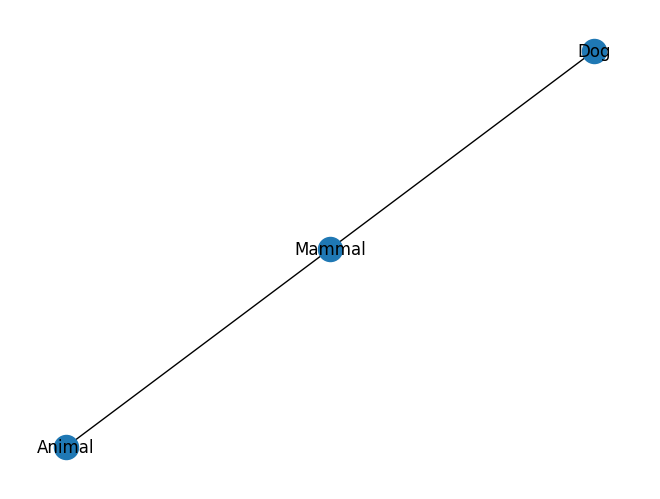

In [13]:
# sementic networks
!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('Dog', 'Mammal'), ('Mammal', 'Animal')])

nx.draw(G, with_labels=True)
plt.show()

In [15]:
#machine Learning/Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load dataset
data = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

# traineing Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

print(f"Accuracy: {model.score(X_test, y_test)}")

Accuracy: 0.9111111111111111


In [18]:
# Neural Networks for AND/OR Gates
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

#input and output data for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# build the model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#train the model
model.fit(X, y, epochs=500, verbose=0)

print(model.predict(X))
# Backpropagation is integrated with neural network training using deep learning libraries like Keras (as shown above)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.3882758 ]
 [0.6200865 ]
 [0.50532436]
 [0.7242774 ]]


In [19]:
#expert System for Disease Prediction:
symptoms = {'fever': 'Flu', 'rash': 'Allergy'}

def diagnose(symptom):
    return symptoms.get(symptom, 'Unknown')

print(diagnose('fever'))

Flu


In [20]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize

sentence = "Artificial intelligence is the future."
tokens = word_tokenize(sentence)
print(tokens)

Defaulting to user installation because normal site-packages is not writeable
['Artificial', 'intelligence', 'is', 'the', 'future', '.']
